In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("student_dropout.csv")
df.head()

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,False


In [3]:
# Display basic info
print("Dataset shape:", df.shape)
print("Columns:\n", df.columns)
print("\nMissing values:\n", df.isnull().sum())

Dataset shape: (649, 34)
Columns:
 Index(['School', 'Gender', 'Age', 'Address', 'Family_Size', 'Parental_Status',
       'Mother_Education', 'Father_Education', 'Mother_Job', 'Father_Job',
       'Reason_for_Choosing_School', 'Guardian', 'Travel_Time', 'Study_Time',
       'Number_of_Failures', 'School_Support', 'Family_Support',
       'Extra_Paid_Class', 'Extra_Curricular_Activities', 'Attended_Nursery',
       'Wants_Higher_Education', 'Internet_Access', 'In_Relationship',
       'Family_Relationship', 'Free_Time', 'Going_Out',
       'Weekend_Alcohol_Consumption', 'Weekday_Alcohol_Consumption',
       'Health_Status', 'Number_of_Absences', 'Grade_1', 'Grade_2',
       'Final_Grade', 'Dropped_Out'],
      dtype='object')

Missing values:
 School                         0
Gender                         0
Age                            0
Address                        0
Family_Size                    0
Parental_Status                0
Mother_Education               0
Father_Education 

In [4]:
#  Encode categorical features
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

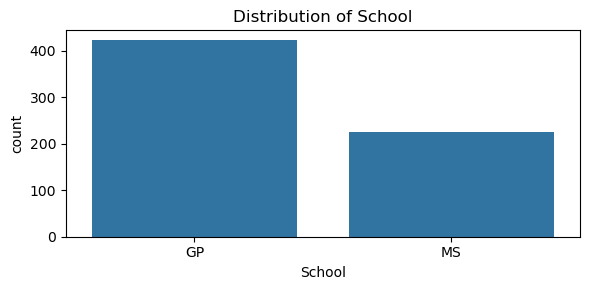

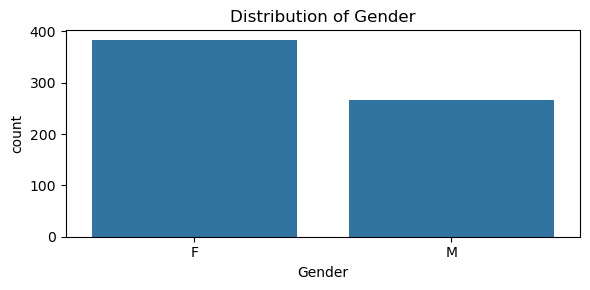

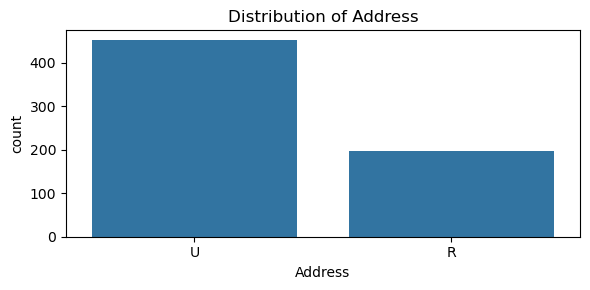

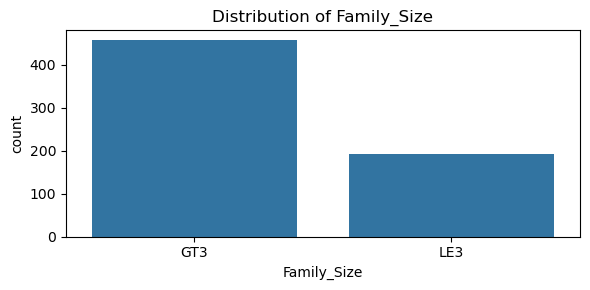

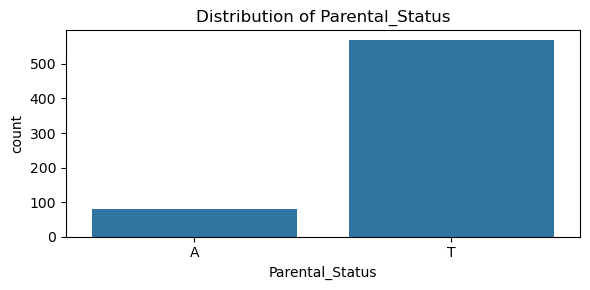

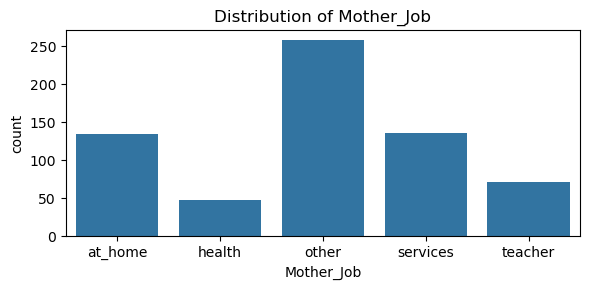

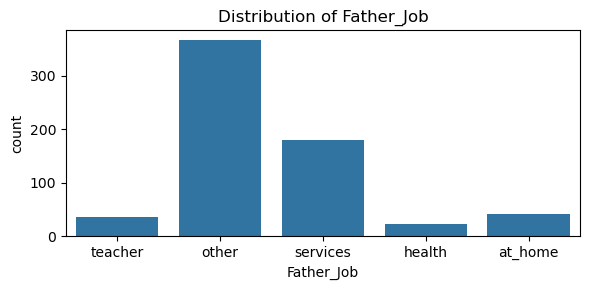

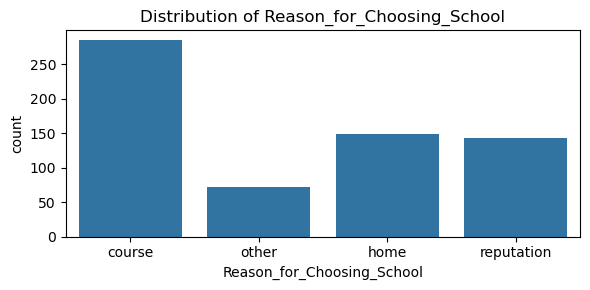

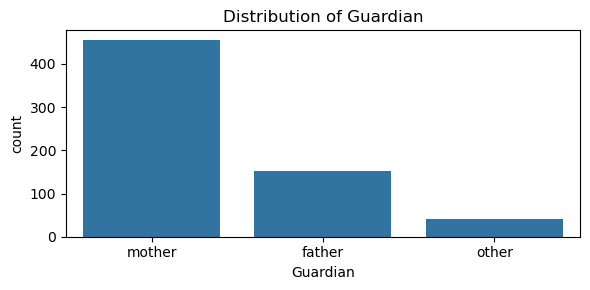

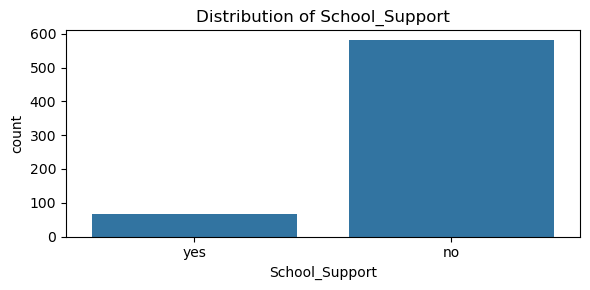

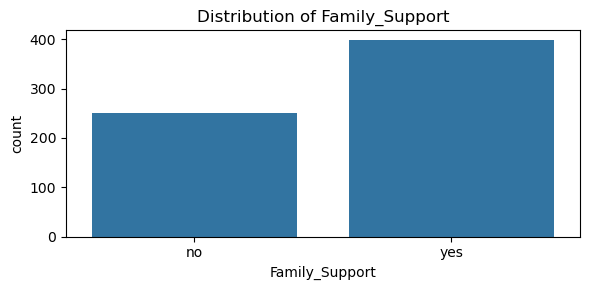

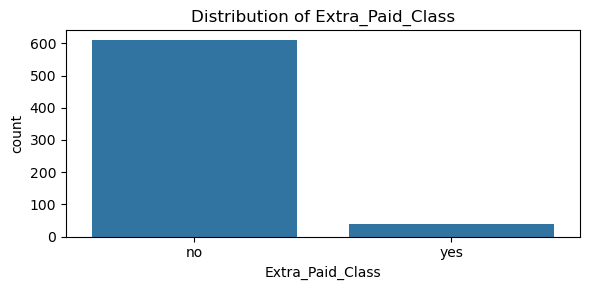

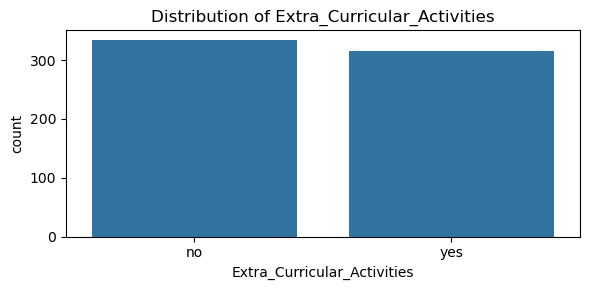

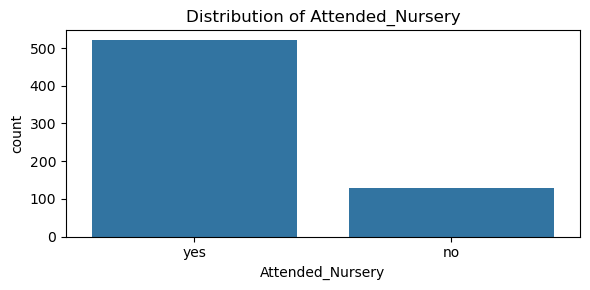

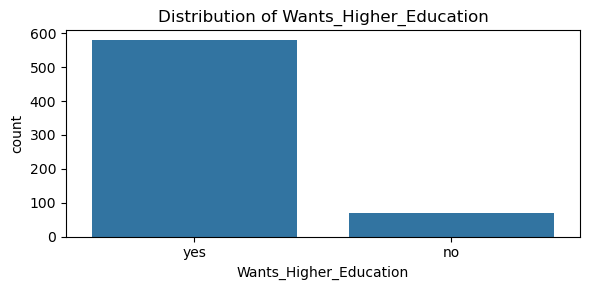

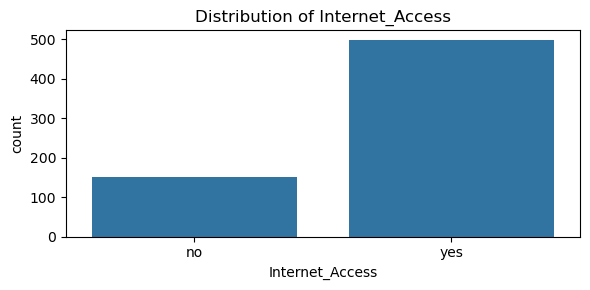

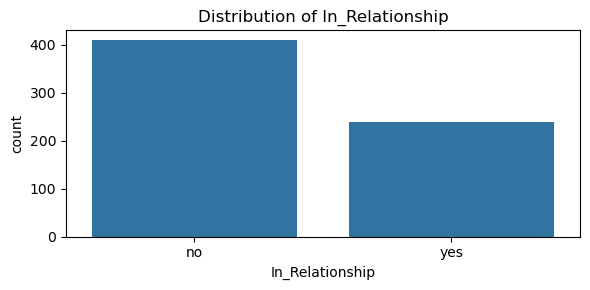

In [5]:
# Plot categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

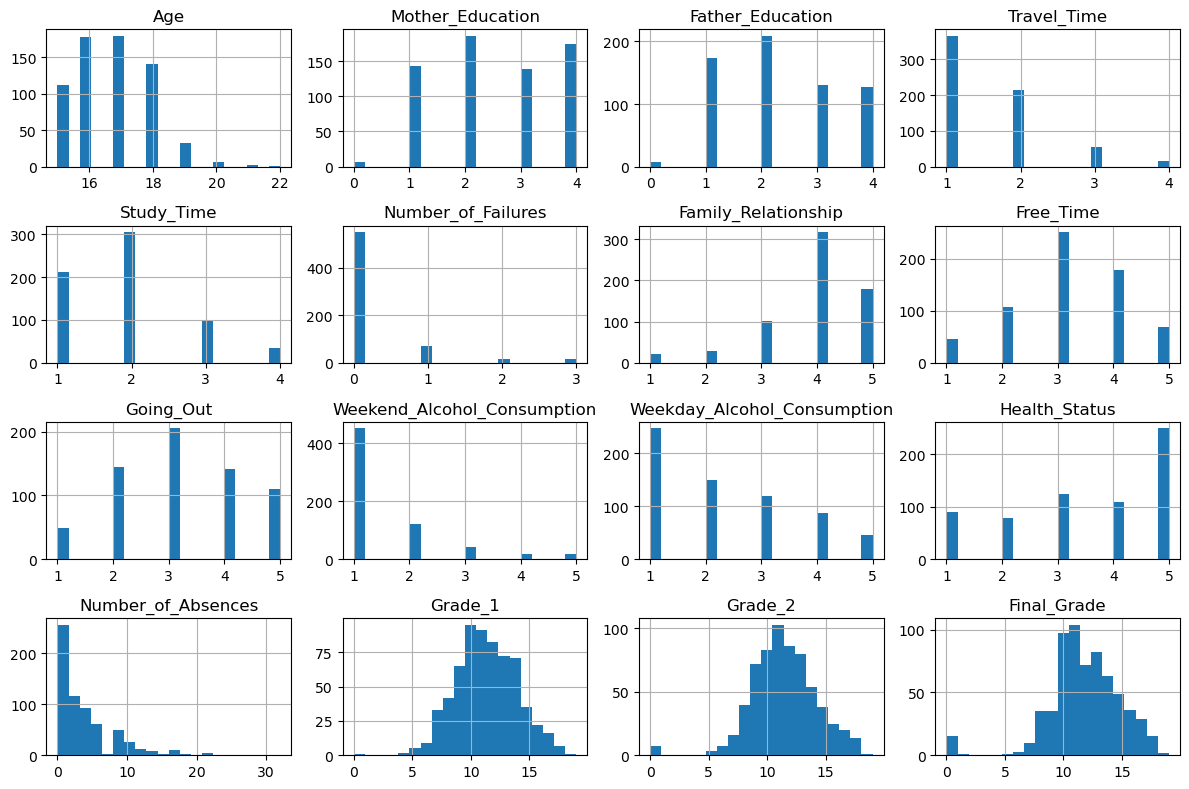

In [6]:
# Plot numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

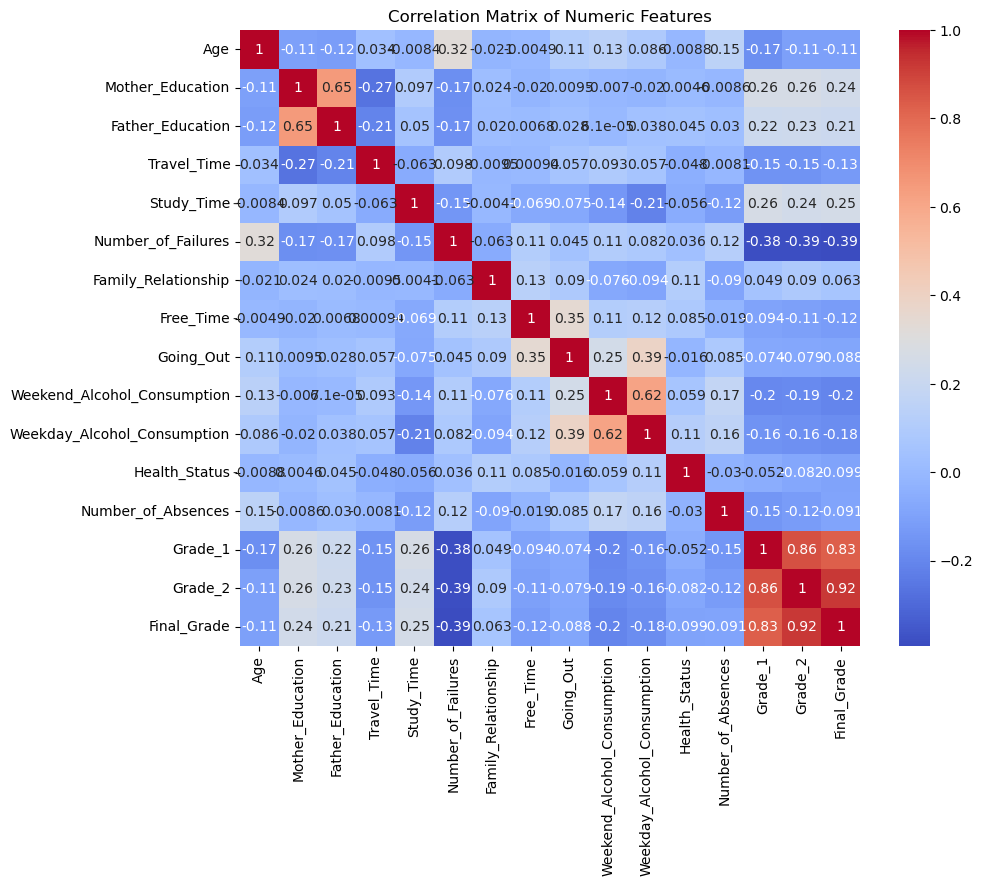

In [7]:
# Only select numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

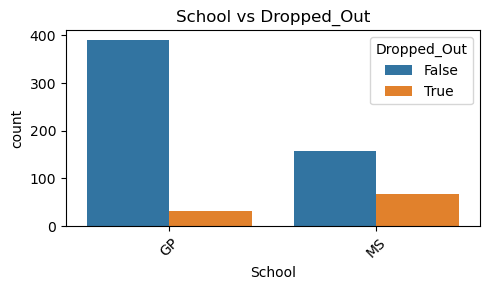

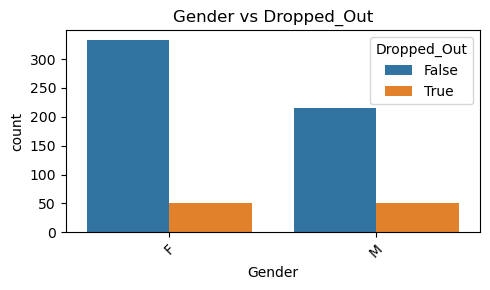

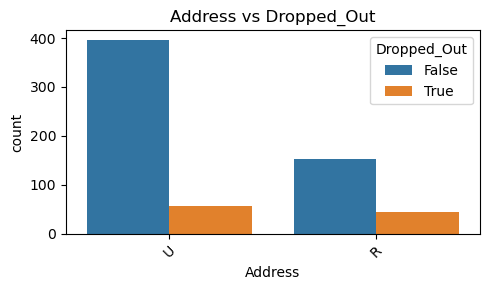

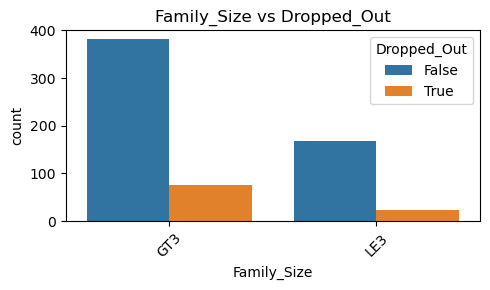

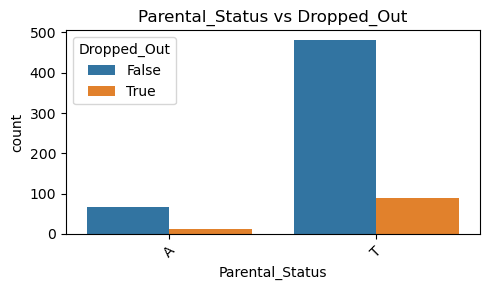

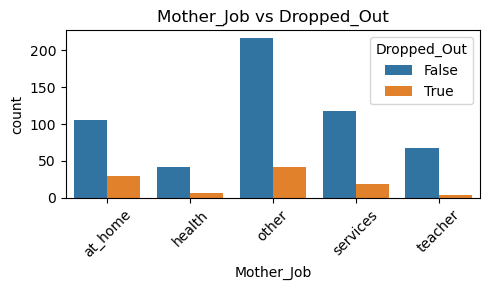

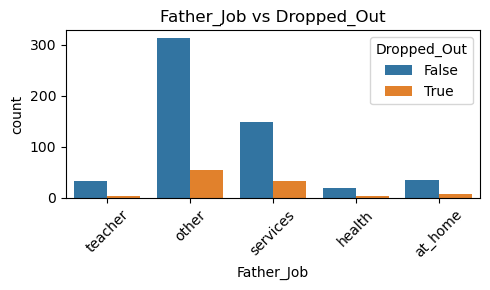

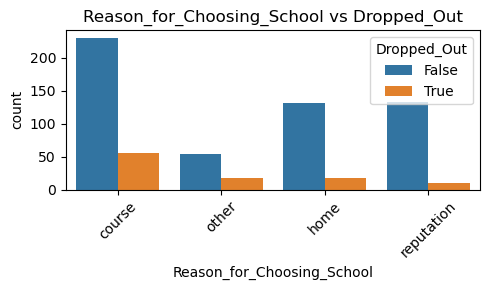

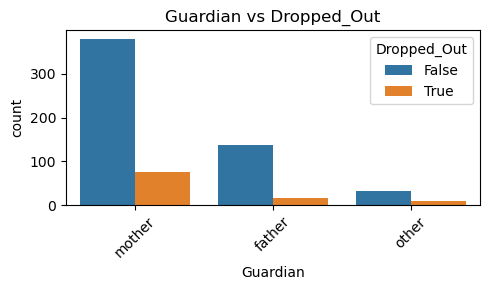

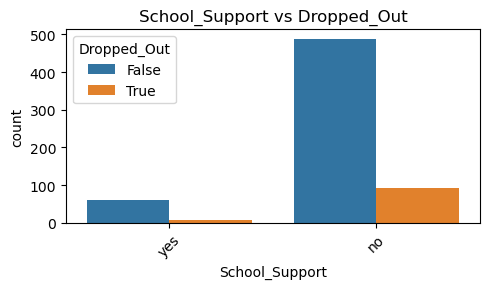

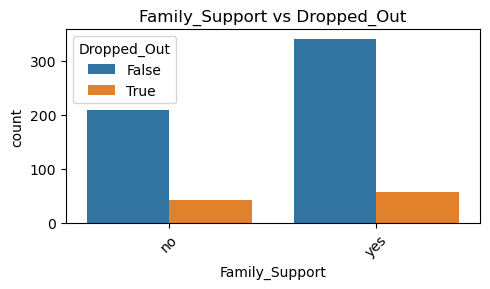

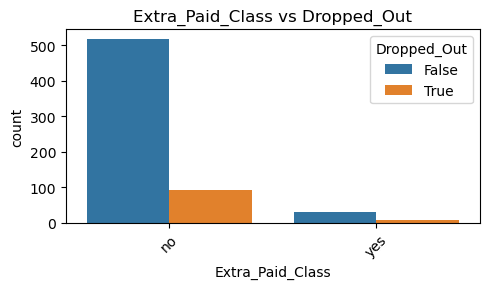

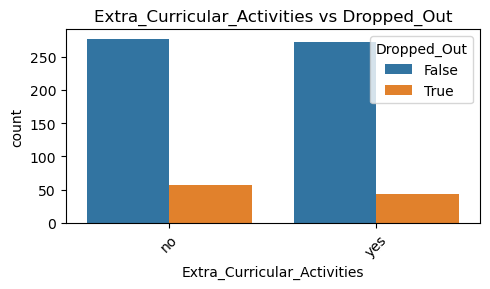

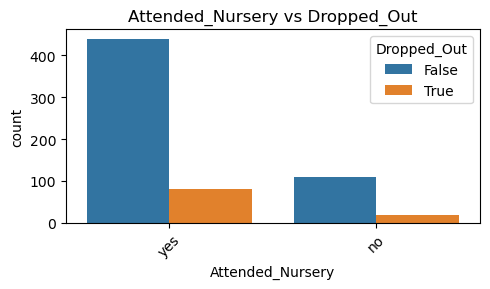

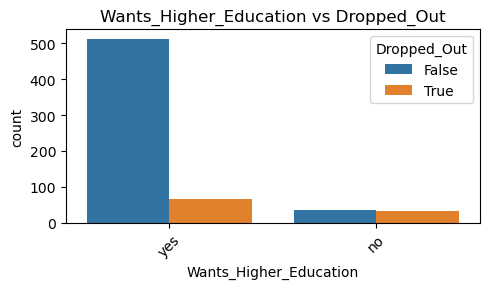

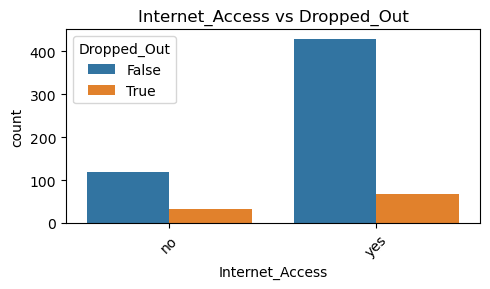

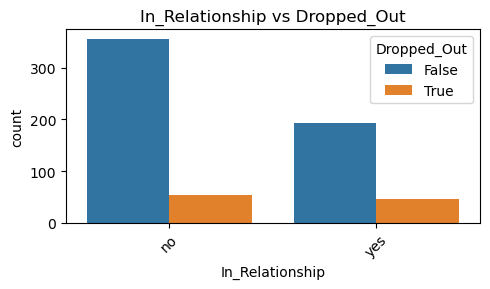

In [8]:
target_col = "Dropped_Out"  # replace with your actual target

for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(data=df, x=col, hue=target_col)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs {target_col}")
    plt.tight_layout()
    plt.show()


In [9]:
#  Define features and target

features = [
    'Age', 'Gender', 'Study_Time', 'Number_of_Failures',
    'Parental_Status', 'Mother_Education', 'Father_Education',
    'Extra_Paid_Class', 'Wants_Higher_Education', 'Internet_Access',
    'Number_of_Absences', 'Final_Grade'
]
X = df_encoded[features]

target_column = 'Dropped_Out'  
y = df_encoded[target_column]


In [10]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)


In [11]:
#  Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
#  Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_res, y_res)


RandomForestClassifier(random_state=42)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

       False       1.00      1.00      1.00       115
        True       1.00      1.00      1.00        15

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130

[[115   0]
 [  0  15]]


In [14]:
#  Feature Importance Plot
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)


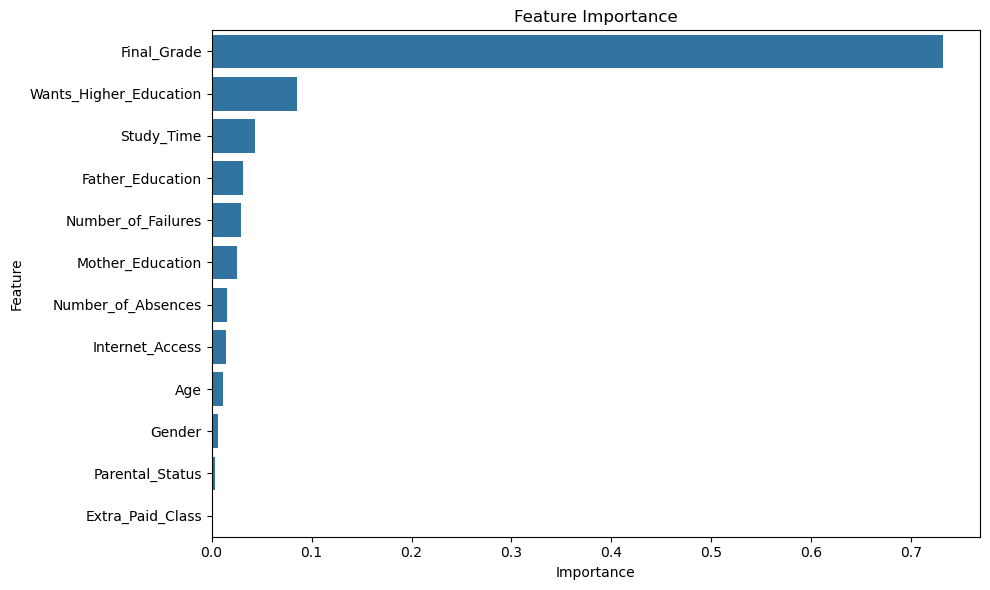

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [17]:
import pandas as pd

def predict_student_dropout(model, features_list):
    print("\nPlease enter the student's details:")

    # Collect input
    user_age = int(input("Enter student's Age (e.g., 17): "))
    user_gender = input("Enter Gender (F/M): ").upper()
    user_study_time = int(input("Enter Weekly Study Time (1-4): "))
    user_failures = int(input("Enter Number of Past Class Failures (0-3): "))
    user_family_support = input("Family Support (yes/no): ").lower()
    user_internet = input("Internet Access (yes/no): ").lower()
    user_absences = int(input("Number of Absences: "))
    user_wants_higher_edu = input("Wants Higher Education (yes/no): ").lower()
    user_weekend_alcohol = int(input("Weekend Alcohol Consumption (1-5): "))

    # Map input to model features
    user_input_mapped = {
        'Age': user_age,
        'Gender': 0 if user_gender == 'F' else 1,
        'Study_Time': user_study_time,
        'Number_of_Failures': user_failures,
        'Family_Support': 1 if user_family_support == 'yes' else 0,
        'Internet_Access': 1 if user_internet == 'yes' else 0,
        'Number_of_Absences': user_absences,
        'Wants_Higher_Education': 1 if user_wants_higher_edu == 'yes' else 0,
        'Weekend_Alcohol_Consumption': user_weekend_alcohol
    }

    # Create DataFrame
    user_df = pd.DataFrame([user_input_mapped], columns=features_list)

    # Predict
    prediction = model.predict(user_df)[0]
    prediction_proba = model.predict_proba(user_df)[0]

    # Show result
    print("\n--- Prediction Result ---")
    if prediction == 1:
        print("⚠️ Risk of Dropping Out")
        print(f"Probability: {prediction_proba[1]*100:.2f}%")
    else:
        print("✅ Likely to Continue")
        print(f"Probability: {prediction_proba[0]*100:.2f}%")

    # Explanation (basic reasoning)
    print("\n--- Reasoning ---")
    if prediction == 1:
        if user_failures > 0:
            print(f"- {user_failures} past failures")
        if user_absences > 5:
            print(f"- High absences ({user_absences})")
        if user_weekend_alcohol >= 4:
            print("- High weekend alcohol use")
        if user_family_support == 'no':
            print("- No family support")
        if user_wants_higher_edu == 'no':
            print("- No interest in higher education")
    else:
        if user_failures == 0:
            print("- No past failures")
        if user_weekend_alcohol <= 2:
            print("- Low alcohol consumption")
        if user_wants_higher_edu == 'yes':
            print("- Motivated for higher education")

predict_student_dropout(model, features)


Please enter the student's details:


Enter student's Age (e.g., 17):  19
Enter Gender (F/M):  M
Enter Weekly Study Time (1-4):  1
Enter Number of Past Class Failures (0-3):  3
Family Support (yes/no):  no
Internet Access (yes/no):  no
Number of Absences:  15
Wants Higher Education (yes/no):  yes
Weekend Alcohol Consumption (1-5):  5



--- Prediction Result ---
⚠️ Risk of Dropping Out
Probability: 58.00%

--- Reasoning ---
- 3 past failures
- High absences (15)
- High weekend alcohol use
- No family support


In [19]:
# Save the model 
import joblib # For saving and Loading the Trained Model
joblib.dump(model, 'student_dropout_predict.pkl')

['student_dropout_predict.pkl']